# RhizoScan Pipeline

This pipeline is a step by step pipeline

## Common import

In [1]:
%matplotlib notebook

import cv2
from matplotlib import pyplot as plt
from IPython.display import Image

## RhizoScan Import

In [2]:
import rhizoscan.image
from rhizoscan import get_data_path
from rhizoscan.root.pipeline import load_image, detect_petri_plate, compute_graph, compute_tree
from rhizoscan.root.pipeline.arabidopsis import segment_image, detect_leaves
from rhizoscan.root.graph.mtg import tree_to_mtg

## RSA Image

In [3]:
image_filename = get_data_path('pipeline/big_root.jpg')
# Image(image_filename)

Report results : +1 image loaded well

### Load Image

dans cette section, l'image se télécharge bien et toutes les racines apparaîssent bien.

<IPython.core.display.Javascript object>


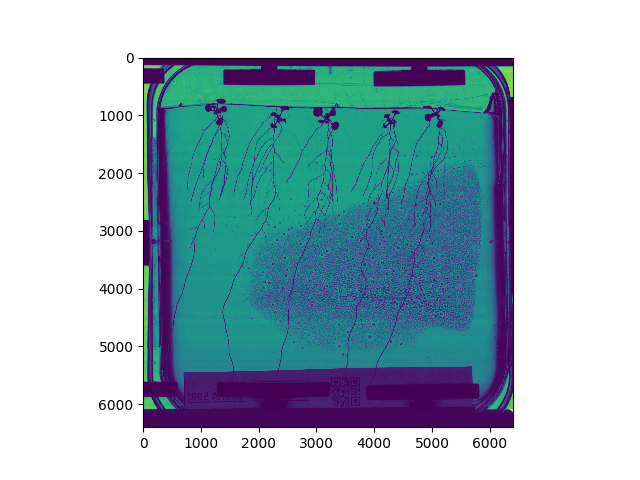

In [4]:
image = load_image(image_filename)
plt.imshow(image)

### Detect features (Petri plate)

dans cette section, l'image se télécharge bien et toutes les racines apparaîssent bien.

c'est au niveau de cette section que je ne comprend pas ce qui me donne comme image, d'où je dois revoir ce que fait le code.

In [29]:
cv2_image = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)
cv2_image = cv2.resize(cv2_image, (3200, 3200))
cv2_image[2700:,:] = 0
cv2_image[:450,:] = 0
cv2_image[:,:300] = 0
cv2_image[:,2900:] = 0
cv2_image = cv2.GaussianBlur(cv2_image,(15,15), 5)
cv2_image = cv2.GaussianBlur(cv2_image,(5,5), 5)
tmp_filename = "1_preprocess.png"
cv2.imwrite(tmp_filename, cv2_image)
plt.imshow(cv2_image)

In [30]:
image = load_image(tmp_filename)

In [31]:
pmask, px_scale, hull = detect_petri_plate(image, border_width=15, plate_size=120, fg_smooth=1)
print px_scale, hull.shape

plt.imshow(pmask)

0.0492579336788 (6993L, 2L)


### Image Segmentation

L'image se segmente bien; le bruit de l'image d'origine n'apparait pas. Le problème c'est le nombre de racine qui ne
sort pas bien

(slice(455L, 2695L, None), slice(305L, 2895L, None)) (2240L, 2590L)


<IPython.core.display.Javascript object>


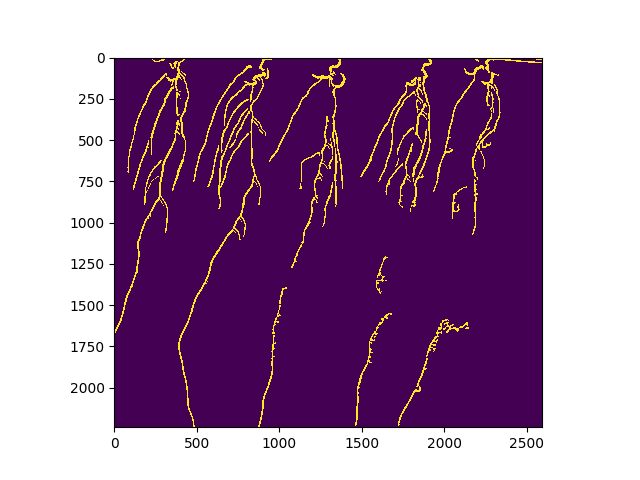

In [32]:
# root_max_radius = root min radius not max
rmask, bbox = segment_image(image.copy(), pmask.copy(), root_max_radius=2, min_dimension=200, smooth=1)
# cv2.imwrite("2_cropped.png", cv2_image[312:2688, 312:2888])
print bbox, rmask.shape

## WRITE & READ
filename = "3_seg.png"
serializer = rhizoscan.image.PILSerializer("gray", float, "PNG")
## write
# serializer.dump(rmask, filename)
## read
# rmask = serializer.load(filename)

# plot
plt.imshow(rmask)

### Detect leaves and seed

es feuilles et les racines se détectent bien en gardant les mêmes paramètres leaf_bbox, mais juste modifié le nombre de plantes plant_number.

<IPython.core.display.Javascript object>


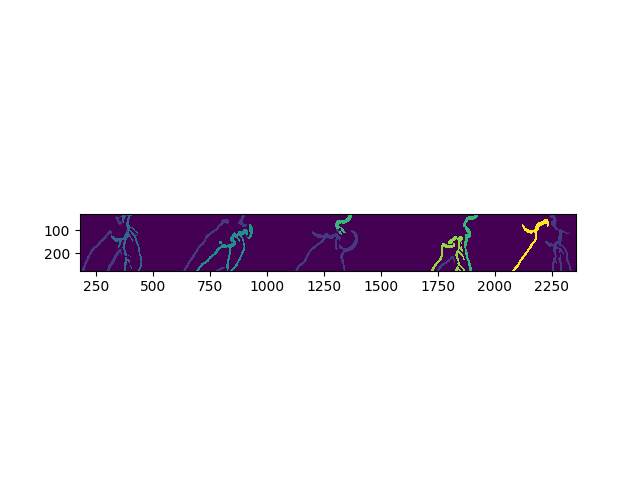

In [33]:
seed_map = detect_leaves(rmask, image, bbox, plant_number=5, leaf_bbox=[0, 0, 0.9, 0.125])
#imshow(seed_map)
plt.imshow(seed_map+rmask)

### Compute the graph corresponding to the RSA

Bien que j'ai pu modifier le paramètre linewidth, le graphe apparait bien mais je dois comprendre ce que c'est derrière ce graphe ou ce que fait réellement dans cette étape.


<IPython.core.display.Javascript object>


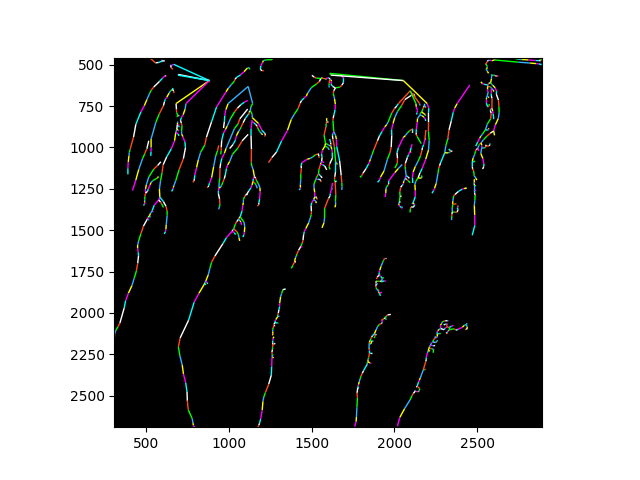

c:\users\artzetsi\pycharmprojects\phenome\rhizoscan\src\rhizoscan\root\graph\__init__.py:81: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  plt.gca().set_axis_bgcolor(bg)


In [34]:
graph = compute_graph(rmask,seed_map,bbox)
graph.plot(linewidth=1)

### Extract a tree from the graph

L'extraction selon moi, ne se passe bien vu que la courbe de toutes les racines n'apparait pas bien.


c:\users\artzetsi\pycharmprojects\phenome\rhizoscan\src\rhizoscan\root\graph\nsa.py:307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif ids=='auto': self.setdefault('id',_np.arange(self.number()))
c:\users\artzetsi\pycharmprojects\phenome\rhizoscan\src\rhizoscan\root\graph\__init__.py:196: RuntimeWarning: divide by zero encountered in divide
  shifty  = _np.arange(len(axe_node))/ms % (2*ms+1) - ms


<IPython.core.display.Javascript object>


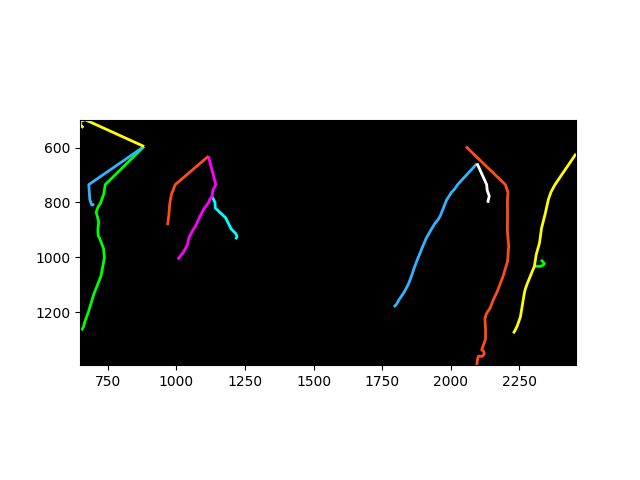

In [35]:
tree = compute_tree(graph, px_scale=px_scale)
tree.plot(linewidth=2)

### Save the RSA into an MTG

In [36]:
g = rsa = tree_to_mtg(tree)
g.display()

MTG : nb_vertices=145, nb_scales=4
/P			(id=1)											
^/A			(id=27)											
^/S			(id=28)											
	+A			(id=119)										
	^/S			(id=120)										
	^<S			(id=121)										
	^<S			(id=122)										
	^<S			(id=123)										
	^<S			(id=124)										
	^<S			(id=125)										
	+A			(id=126)										
	^/S			(id=127)										
	^<S			(id=128)										
	^<S			(id=129)										
	^<S			(id=130)										
^<S			(id=29)											
^<S			(id=30)											
^<S			(id=31)											
^<S			(id=32)											
^<S			(id=33)											
^<S			(id=34)											
^<S			(id=35)											
^<S			(id=36)											
^<S			(id=37)											
^<S			(id=38)											
^<S			(id=39)											
^<S			(id=40)											
^<S			(id=41)											
^<S			(id=42)											
^<S			(id=43)											
^<S			(id=44)											
^<S			(id=45)											
^<S			(id=46)											
^<S			(id=47)											
/P			(id=2)											
^/A			(id=48)											
^/S			(id=49)											
	+A			(id=113)										
	^/S			(i